In [1]:
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import numpy as np
from tensorflow.keras import backend as K
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import pandas as pd

# Load 'fashion_mnist' data

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

# Scale the values to a range of 0 to 1 of both data sets

In [4]:
train_images = train_images / 255.0
test_images = test_images / 255.0

# Flatten input data

In [5]:
X_train = train_images.reshape(60000,-1)
X_test = test_images.reshape(10000, -1)

In [6]:
X_train.shape , X_test.shape

((60000, 784), (10000, 784))

# one-hot-encodes labels

In [7]:
ytrain = to_categorical(train_labels)

In [8]:
ytrain.shape

(60000, 10)

# Build the model

In [9]:
K.clear_session()

In [10]:
model_01 = Sequential([
                    Dense(units=128, activation='relu', input_shape=X_train[0].shape),
                    Dense(units=10, activation='softmax')
])

In [11]:
model_01.compile(
            optimizer='adam',
            loss= 'categorical_crossentropy',
            metrics=['accuracy']
)

In [12]:
model_01.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [13]:
hist = model_01.fit(X_train,ytrain, batch_size=200, epochs=30, verbose='auto', validation_split=0.2)

Epoch 1/30
240/240 [==============================] - 3s 7ms/step - loss: 0.6286 - accuracy: 0.7907 - val_loss: 0.4712 - val_accuracy: 0.8391
Epoch 2/30
240/240 [==============================] - 1s 6ms/step - loss: 0.4424 - accuracy: 0.8467 - val_loss: 0.4176 - val_accuracy: 0.8577
Epoch 3/30
240/240 [==============================] - 1s 6ms/step - loss: 0.3936 - accuracy: 0.8629 - val_loss: 0.4037 - val_accuracy: 0.8560
Epoch 4/30
240/240 [==============================] - 1s 6ms/step - loss: 0.3703 - accuracy: 0.8699 - val_loss: 0.3692 - val_accuracy: 0.8703
Epoch 5/30
240/240 [==============================] - 2s 7ms/step - loss: 0.3498 - accuracy: 0.8758 - val_loss: 0.3548 - val_accuracy: 0.8745
Epoch 6/30
240/240 [==============================] - 1s 6ms/step - loss: 0.3302 - accuracy: 0.8817 - val_loss: 0.3474 - val_accuracy: 0.8790
Epoch 7/30
240/240 [==============================] - 2s 7ms/step - loss: 0.3168 - accuracy: 0.8863 - val_loss: 0.3640 - val_accuracy: 0.8718
Epoch 

Text(0.5, 0, 'Epochs')

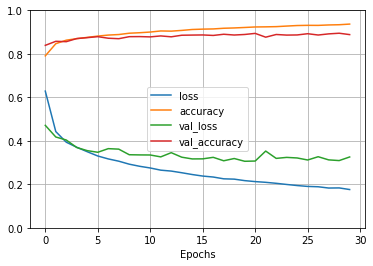

In [14]:
pd.DataFrame(hist.history).plot()
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.xlabel('Epochs')

In [15]:
model_01.save('/Users/Disalo/SPICED/euclidean_eukalyptus/payam_work/Week_09/imageclassifier/models/Solid_MNIST_model.h5')